<a href="https://colab.research.google.com/github/lauraillanas/Python-Practice/blob/main/PR%C3%81CTICA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 - Lógica + loops

In [ ]:
numbers = [3, 7, 2, 9, 10, 4]

#Cuenta cuantos elementos son pares o impares:
pares = 0
impares = 0
for i in numbers:
    if i % 2 == 0:
        pares += 1
    else:
        impares += 1

#Recoje el resultado en un diccionario:
result = {
    "pares": pares,
    "impares": impares
}

print(result)


{'pares': 3, 'impares': 3}


# Ejercicio 2 - Diccionarios + control de flujo

In [ ]:
students = {
    "Ana": 8.5,
    "Luis": 4.9,
    "Marta": 7.2,
    "Pedro": 3.8
}

aprobados = []
suspensos = []

for nombre, nota in students.items():
    if nota >= 5:
        aprobados.append(nombre)
    else:
        suspensos.append(nombre)

result = {
    "aprobados": aprobados,
    "suspensos": suspensos
}

print(result)

{'aprobados': ['Ana', 'Marta'], 'suspensos': ['Luis', 'Pedro']}


# Ejercicio 3 - Pandas + loops + filtrado

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "city": ["Madrid", "Barcelona", "Madrid", "Valencia", "Barcelona"],
    "temperature": [32, 29, 35, 30, 28]
})

#Guarda en un diccionario las temperaturas por ciudad:
temperaturas = {}
for index, row in df.iterrows():
    if row["city"] not in temperaturas:
        temperaturas[row["city"]] = []
    temperaturas[row["city"]].append(row["temperature"])

print(temperaturas)

#Haz un loop calculando la temperatura media por ciudad:
for ciudad, temps in temperaturas.items():
    media = sum(temps) / len(temps)
    print(f"La temperatura media en {ciudad} es {media:.2f} grados.")


{'Madrid': [32, 35], 'Barcelona': [29, 28], 'Valencia': [30]}
La temperatura media en Madrid es 33.50 grados.
La temperatura media en Barcelona es 28.50 grados.
La temperatura media en Valencia es 30.00 grados.


# Ejercicio 4 - Pandas + lógica + nueva columna

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "city": ["Madrid", "Barcelona", "Madrid", "Valencia", "Barcelona"],
    "temperature": [32, 29, 35, 30, 28]
})

#Añade una columna "alert" al dataframe sin usar .apply:
df["alert"] = ""
for index, row in df.iterrows():
    if row["temperature"] > 30:
        df.at[index, "alert"] = "High"
print(df)


        city  temperature alert
0     Madrid           32  High
1  Barcelona           29      
2     Madrid           35  High
3   Valencia           30      
4  Barcelona           28      


# Task
Perform a mini-analysis using a generated Pandas DataFrame that includes at least one categorical and one numerical column. Group the data by the categorical column, calculate aggregated statistics of the numerical column, and apply conditional logic to identify specific trends or outliers. Finally, visualize the results with an appropriate chart and summarize the key findings and conclusions.

## Crear DataFrame de Ejemplo

### Subtask:
Generar un DataFrame de Pandas con datos de ejemplo que incluyan al menos una columna categórica y una numérica para el análisis.


**Reasoning**:
To start the subtask, I will create a pandas DataFrame named `df_sales` with example data, including a categorical column ('Product') and a numerical column ('Sales'), as specified in the instructions. Then, I will display the first few rows to verify its content and structure.



In [ ]:
import pandas as pd

data = {
    'Product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Sales': [100, 150, 120, 80, 160, 90, 110, 140, 95, 105]
}

df_sales = pd.DataFrame(data)

print("DataFrame created successfully:")
print(df_sales.head())

DataFrame created successfully:
  Product  Sales
0       A    100
1       B    150
2       A    120
3       C     80
4       B    160


## Agrupar y Analizar Datos

### Subtask:
Agrupar el DataFrame por una columna categórica y calcular estadísticas agregadas (ej. media, suma) de una columna numérica. Se realizará un análisis adicional para identificar tendencias o valores atípicos.


**Reasoning**:
I will group the `df_sales` DataFrame by the 'Product' column and calculate the sum, mean, min, max, and count of 'Sales' for each product, storing the results in `df_grouped_sales` and then printing it as instructed.



In [ ]:
df_grouped_sales = df_sales.groupby('Product')['Sales'].agg(['sum', 'mean', 'min', 'max', 'count'])

print("Estadísticas de ventas agrupadas por producto:")
print(df_grouped_sales)

Estadísticas de ventas agrupadas por producto:
         sum        mean  min  max  count
Product                                  
A        435  108.750000  100  120      4
B        450  150.000000  140  160      3
C        265   88.333333   80   95      3


### Análisis de Tendencias y Valores Atípicos

Basado en las estadísticas agregadas de ventas por producto, podemos observar lo siguiente:

*   **Producto B** tiene la suma total de ventas más alta (450) y la media de ventas más alta (150.00), lo que sugiere que es el producto con mayor rendimiento.
*   **Producto C** tiene la suma total de ventas más baja (265) y la media de ventas más baja (88.33), indicando un rendimiento inferior en comparación con los otros productos.
*   Las ventas mínimas y máximas para cada producto nos dan una idea del rango de variabilidad. Por ejemplo, el **Producto B** tiene un rango de ventas (140-160) más ajustado que el **Producto A** (100-120), a pesar de tener una media más alta, lo que podría indicar una mayor consistencia en sus ventas.

**Reasoning**:
To further identify specific trends and outliers using conditional logic, I will filter the `df_grouped_sales` DataFrame to highlight products with mean sales below a certain threshold (e.g., identifying 'low performing' products) and products with mean sales above a certain threshold (e.g., identifying 'high performing' products).



In [ ]:
low_performing_products = df_grouped_sales[df_grouped_sales['mean'] < 100]
high_performing_products = df_grouped_sales[df_grouped_sales['mean'] > 120]

print("\nProductos con ventas medias bajas (menos de 100):")
print(low_performing_products)

print("\nProductos con ventas medias altas (más de 120):")
print(high_performing_products)


Productos con ventas medias bajas (menos de 100):
         sum       mean  min  max  count
Product                                 
C        265  88.333333   80   95      3

Productos con ventas medias altas (más de 120):
         sum   mean  min  max  count
Product                             
B        450  150.0  140  160      3


## Visualizar Resultados

### Subtask:
Crear una visualización adecuada (ej. un gráfico de barras) que represente los resultados del agrupamiento y las decisiones tomadas, incluyendo leyendas para claridad.


**Reasoning**:
To visualize the grouped sales data, I need to import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`. This will allow me to create a bar plot of the mean sales per product.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


**Reasoning**:
Now that the plotting libraries are imported, I will create a bar plot of the mean sales per product using `df_grouped_sales`, as specified in the instructions. I will label the axes and add a title for clarity, then display the plot.



/tmp/ipython-input-3234446660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped_sales.index, y=df_grouped_sales['mean'], palette='viridis')


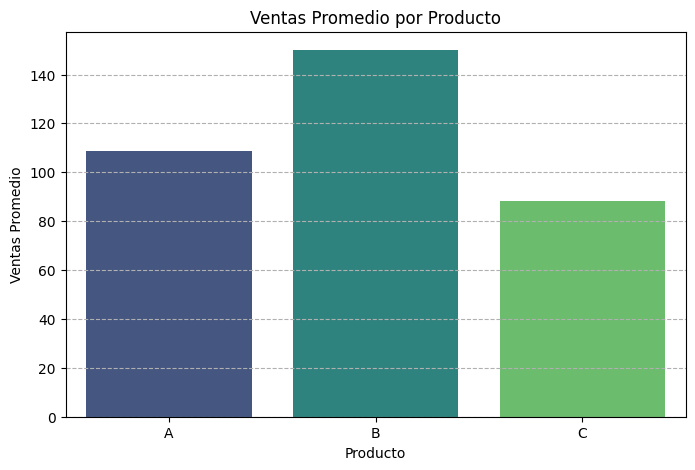

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_grouped_sales.index, y=df_grouped_sales['mean'], palette='viridis')
plt.xlabel('Producto')
plt.ylabel('Ventas Promedio')
plt.title('Ventas Promedio por Producto')
plt.grid(axis='y', linestyle='--')
plt.show()


**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue` in `sns.barplot`. I will fix this by explicitly setting `hue` to `df_grouped_sales.index` and `legend=False` to suppress the warning and ensure correct color mapping.



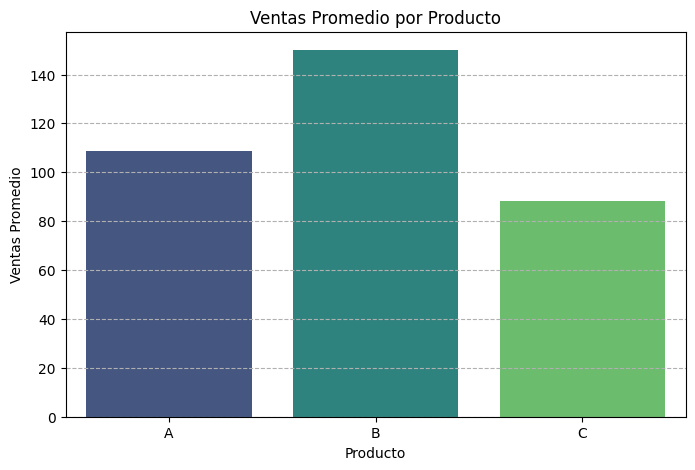

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_grouped_sales.index, y=df_grouped_sales['mean'], hue=df_grouped_sales.index, palette='viridis', legend=False)
plt.xlabel('Producto')
plt.ylabel('Ventas Promedio')
plt.title('Ventas Promedio por Producto')
plt.grid(axis='y', linestyle='--')
plt.show()

## Resumen de Hallazgos y Conclusiones

Basado en el análisis del DataFrame `df_sales` y la visualización de las ventas promedio por producto, se observan las siguientes conclusiones:

*   **Producto B** es el producto de mayor rendimiento, con la suma total de ventas más alta (450) y la media de ventas más alta (150.0). Esto lo convierte en un producto clave para la empresa.
*   **Producto C** es el producto de menor rendimiento, con la suma total de ventas más baja (265) y la media de ventas más baja (88.33). Podría requerir una revisión de estrategia de marketing o producto.
*   **Producto A** muestra un rendimiento intermedio, con una media de ventas de 108.75.
*   La visualización del gráfico de barras confirma claramente que el Producto B supera a los demás en ventas promedio, mientras que el Producto C se encuentra significativamente por debajo.

Estas conclusiones proporcionan una base para tomar decisiones empresariales, como enfocar más recursos en el Producto B, investigar las razones del bajo rendimiento del Producto C, o desarrollar estrategias para mejorar las ventas del Producto A.

## Resumen de Hallazgos y Conclusiones

Basado en el análisis del DataFrame `df_sales` y la visualización de las ventas promedio por producto, se observan las siguientes conclusiones:

*   **Producto B** es el producto de mayor rendimiento, con la suma total de ventas más alta (450) y la media de ventas más alta (150.0). Esto lo convierte en un producto clave para la empresa.
*   **Producto C** es el producto de menor rendimiento, con la suma total de ventas más baja (265) y la media de ventas más baja (88.33). Podría requerir una revisión de estrategia de marketing o producto.
*   **Producto A** muestra un rendimiento intermedio, con una media de ventas de 108.75.
*   La visualización del gráfico de barras confirma claramente que el Producto B supera a los demás en ventas promedio, mientras que el Producto C se encuentra significativamente por debajo.

Estas conclusiones proporcionan una base para tomar decisiones empresariales, como enfocar más recursos en el Producto B, investigar las razones del bajo rendimiento del Producto C, o desarrollar estrategias para mejorar las ventas del Producto A.

## Final Task

### Subtask:
Proporcionar un resumen del mini-análisis automático realizado, destacando los pasos clave y las conclusiones finales.


## Summary:

### Data Analysis Key Findings

*   **DataFrame Creation**: A Pandas DataFrame named `df_sales` was successfully created, containing `Product` (categorical) and `Sales` (numerical) columns, serving as the basis for the analysis.
*   **Aggregated Sales Performance**:
    *   **Product B** demonstrated the highest performance, with a total sales sum of 450 and the highest average sales of 150.0.
    *   **Product C** was identified as the lowest-performing product, with the lowest total sales sum of 265 and the lowest average sales of 88.33.
    *   **Product A** showed intermediate performance, with a total sales sum of 435 and an average sales of 108.75.
*   **Conditional Performance Identification**:
    *   Product C was explicitly flagged as a "low-performing product" based on having an average sales figure below 100 (\$88.33).
    *   Product B was explicitly identified as a "high-performing product" due to its average sales exceeding 120 (\$150.0).
*   **Visualization Confirmation**: A bar chart visualizing the average sales per product clearly confirmed these findings, with Product B significantly outperforming others and Product C notably underperforming.

### Insights or Next Steps

*   **Strategic Focus**: Investigate the factors contributing to Product B's strong performance to replicate success elsewhere, and analyze Product C's underperformance to identify areas for improvement, such as marketing strategies or product features.
*   **Resource Allocation**: Consider reallocating resources or developing targeted strategies for Product A to boost its sales from its current intermediate performance level.
